### IMPORTING LIBRARIWS WHICH  ARE NEEDED 

In [1]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from patsy import dmatrices
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

## importing data set

In [3]:
data = sm.datasets.fair.load_pandas().data

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Creating new dependent variable  

In [5]:
data_new = []
for i in data['affairs']:
    if i > 0:
        data_new.append(1)
    else:
        data_new.append(0)
    

In [6]:
data_new

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
data['new_dependent_varaible'] = data_new

In [8]:
data


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,new_dependent_varaible
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


### data understanding

In [9]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'new_dependent_varaible'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rate_marriage           6366 non-null   float64
 1   age                     6366 non-null   float64
 2   yrs_married             6366 non-null   float64
 3   children                6366 non-null   float64
 4   religious               6366 non-null   float64
 5   educ                    6366 non-null   float64
 6   occupation              6366 non-null   float64
 7   occupation_husb         6366 non-null   float64
 8   affairs                 6366 non-null   float64
 9   new_dependent_varaible  6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


## in above on dtype , there are float d type which has to changed to int


In [11]:
## checking the unique value for each and every columns 
print(data['rate_marriage'].unique())
print(data['children'].unique())
print(data['religious'].unique())
print(data['educ'].unique())
print(data['occupation_husb'].unique())
print(data['occupation'].unique())



[3. 4. 5. 2. 1.]
[3.  0.  4.  1.  5.5 2. ]
[3. 1. 2. 4.]
[17. 14. 16. 12. 20.  9.]
[5. 4. 3. 2. 6. 1.]
[2. 3. 5. 4. 1. 6.]


In [12]:
data.children.value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [13]:
data.occupation_husb.value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

## while checking the unique values of each and every column i noticed that in chlidern ther is 5.5 value that doest make sense so better to change into 5 cos that is categorical variable

In [14]:
data['children'] = np.floor(data['children'])#floor() function in NumPy is used to return the floor values of each element in an input array x such that for each of the elements of x , the floor values are less than or equal to it.
print(data['children'].unique())## sucessfully changed into categorical variable


[3. 0. 4. 1. 5. 2.]


## Changing data type of categorical variable 


In [15]:
data['children'] = data['children'].astype(int)

In [16]:
data['rate_marriage'] = data['rate_marriage'].astype(int)
data['religious'] = data['religious'].astype(int)
data['educ'] = data['educ'].astype(int)
data['occupation_husb'] = data['occupation_husb'].astype(int)
data['occupation'] = data['occupation'].astype(int)




In [17]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,new_dependent_varaible
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.380930,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.389855,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.000000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [18]:
data.isnull().sum()

rate_marriage             0
age                       0
yrs_married               0
children                  0
religious                 0
educ                      0
occupation                0
occupation_husb           0
affairs                   0
new_dependent_varaible    0
dtype: int64

## Exploratory data analysis 

<AxesSubplot: ylabel='new_dependent_varaible'>

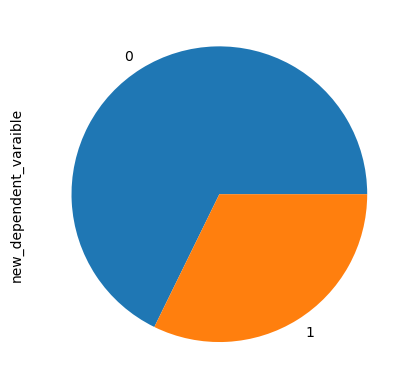

In [19]:
data['new_dependent_varaible'].value_counts().plot(kind = 'pie')

<AxesSubplot: >

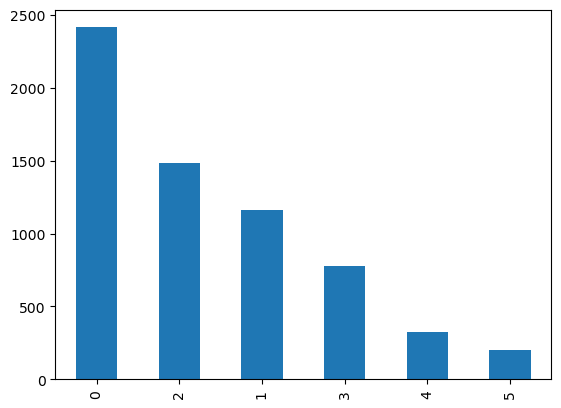

In [20]:
data['children'].value_counts().plot(kind = "bar")

<AxesSubplot: >

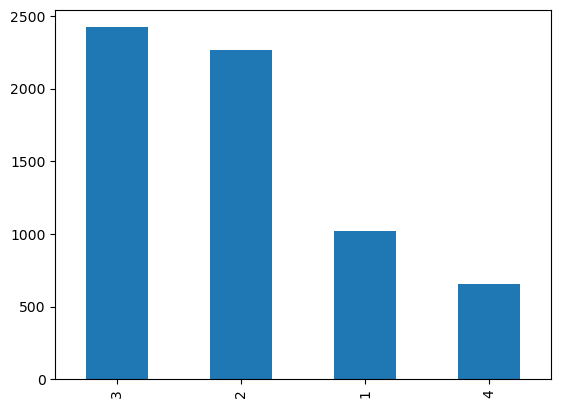

In [21]:
data['religious'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

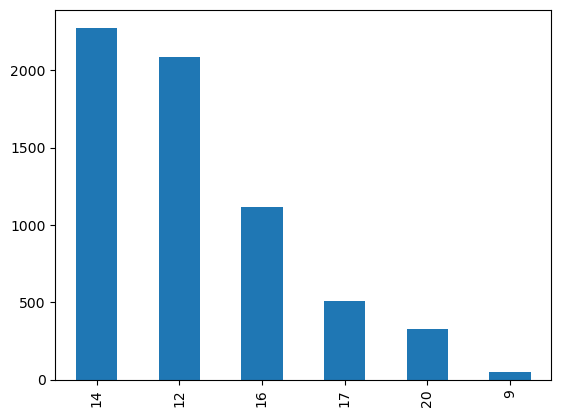

In [22]:
data['educ'].value_counts().plot(kind= 'bar')

<AxesSubplot: >

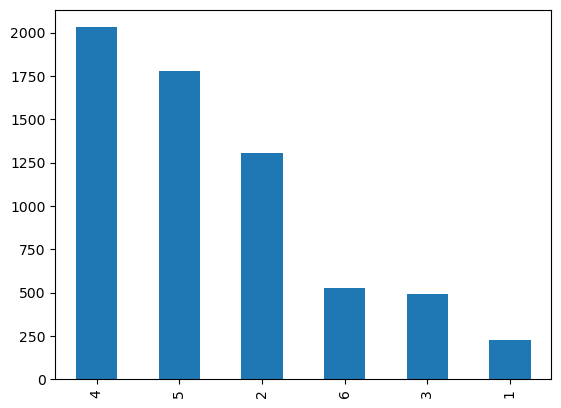

In [23]:
data['occupation_husb'].value_counts().plot(kind='bar')

<AxesSubplot: >

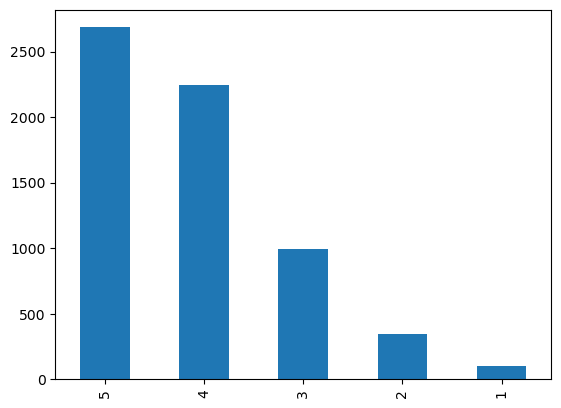

In [24]:
data['rate_marriage'].value_counts().plot(kind='bar')

/tmp/ipykernel_109/1018354820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],hist=False)


<AxesSubplot: xlabel='age', ylabel='Density'>

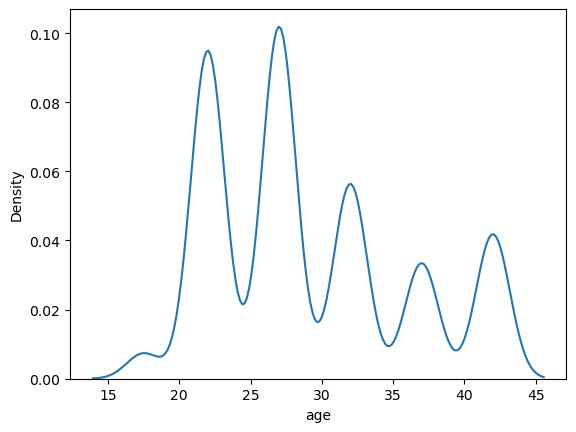

In [25]:
sns.distplot(data['age'],hist=False)

/tmp/ipykernel_109/814901678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['yrs_married'],hist=False)


<AxesSubplot: xlabel='yrs_married', ylabel='Density'>

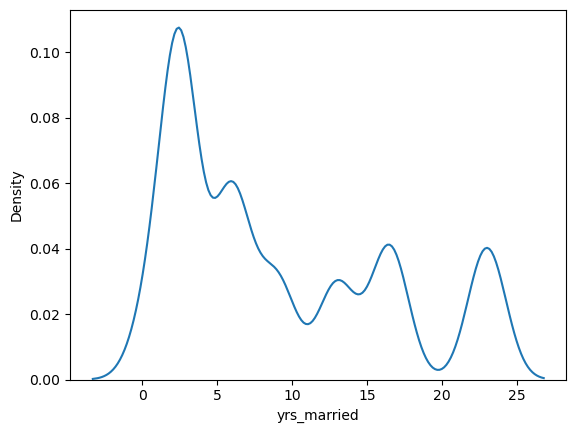

In [26]:
sns.distplot(data['yrs_married'],hist=False)

<AxesSubplot: >

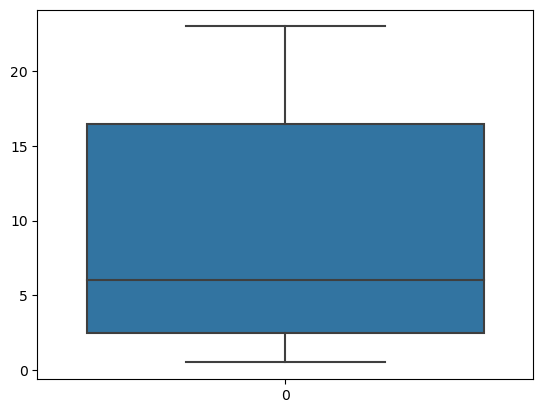

In [27]:
sns.boxplot(data['yrs_married'])

<AxesSubplot: >

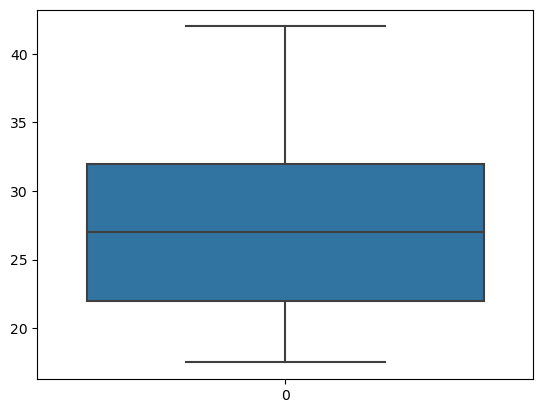

In [28]:
sns.boxplot(data['age'])

In [29]:
data['new_dependent_varaible'].value_counts()

0    4313
1    2053
Name: new_dependent_varaible, dtype: int64

In [30]:
data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,new_dependent_varaible
rate_marriage,1.000000,-0.111127,-0.128978,-0.131083,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.678030,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.778553,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.131083,0.678030,0.778553,1.000000,0.141760,-0.143294,-0.015055,0.088103,-0.070658,0.163212
religious,0.078794,0.136598,0.132683,0.141760,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.143294,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015055,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.088103,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070658,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
new_dependent_varaible,-0.331776,0.146519,0.203109,0.163212,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


<AxesSubplot: >

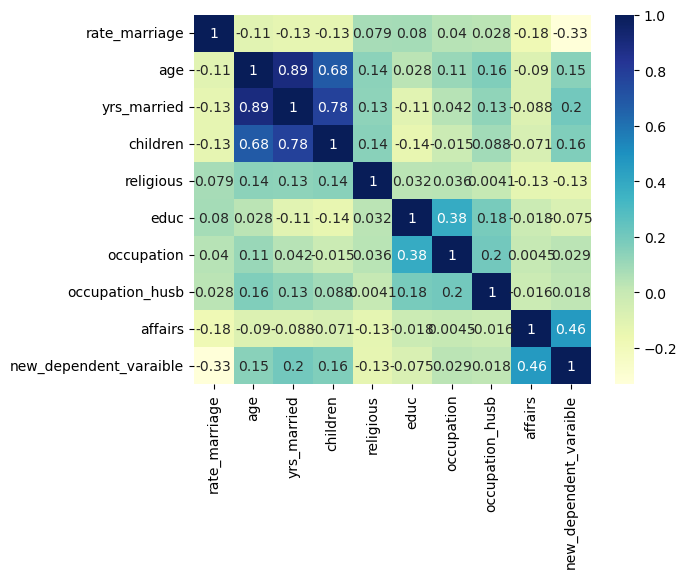

In [31]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

## as the three features are highly correlated example age, yrs_married and childerns has highly correlatex  

In [32]:
data.drop(['age'],axis=1,inplace=True)

In [33]:
data.head()

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,new_dependent_varaible
0,3,9.0,3,3,17,2,5,0.111111,1
1,3,13.0,3,1,14,3,4,3.230769,1
2,4,2.5,0,1,16,3,5,1.400000,1
3,4,16.5,4,3,16,5,5,0.727273,1
4,5,9.0,1,1,14,3,4,4.666666,1


### as the data set is imblanced to doing it into balace


In [34]:
X=data.drop(['new_dependent_varaible'],axis=1)

In [35]:
X

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,9.0,3,3,17,2,5,0.111111
1,3,13.0,3,1,14,3,4,3.230769
2,4,2.5,0,1,16,3,5,1.400000
3,4,16.5,4,3,16,5,5,0.727273
4,5,9.0,1,1,14,3,4,4.666666
...,...,...,...,...,...,...,...,...
6361,5,13.0,2,3,17,4,3,0.000000
6362,4,13.0,1,1,16,5,5,0.000000
6363,5,2.5,0,2,14,3,1,0.000000
6364,5,6.0,1,3,14,3,4,0.000000


In [36]:
y  = data['new_dependent_varaible']

In [37]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: new_dependent_varaible, Length: 6366, dtype: int64

<AxesSubplot: ylabel='new_dependent_varaible'>

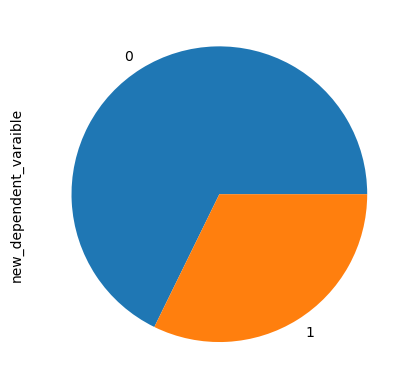

In [38]:
y.value_counts().plot(kind = 'pie')

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.20)

In [40]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5092, 8) (5092,) (1274, 8) (1274,)


In [41]:
X_balanced ,y_balanced = SMOTE().fit_resample(X_train,y_train)

In [42]:
X_balanced

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,4,6.0,1,3,14,3,4,0.000000
1,1,23.0,3,2,12,3,2,0.000000
2,5,2.5,0,1,16,4,5,0.000000
3,5,0.5,0,3,14,3,4,0.000000
4,5,6.0,1,2,12,2,4,0.000000
...,...,...,...,...,...,...,...,...
6871,4,2.5,0,1,12,3,2,1.400000
6872,4,6.0,1,3,13,4,1,7.421038
6873,5,2.5,0,1,20,5,4,1.179670
6874,2,9.0,0,1,14,4,3,4.666666


### The data set is balanced 

<AxesSubplot: >

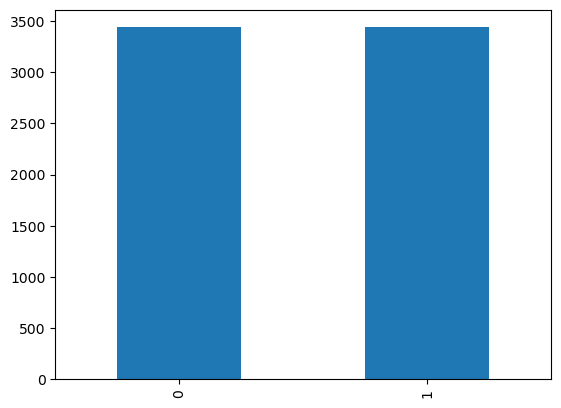

In [43]:
y_balanced.value_counts().plot(kind='bar')

## scaling the data set to get better results

In [44]:
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_balanced)

In [45]:
X_train_transform

array([[ 0.07430741, -0.50164116, -0.30404028, ..., -0.40570233,
         0.15425661, -0.41459839],
       [-2.85090868,  1.80685961,  1.1754933 , ..., -0.40570233,
        -1.35774405, -0.41459839],
       [ 1.04937944, -0.97692073, -1.04380707, ...,  0.6805941 ,
         0.91025695, -0.41459839],
       ...,
       [ 1.04937944, -0.97692073, -1.04380707, ...,  1.76689053,
         0.15425661,  0.04378717],
       [-1.87583665, -0.09425867, -1.04380707, ...,  0.6805941 ,
        -0.60174372,  1.39873224],
       [-2.85090868,  0.92419755,  1.1754933 , ..., -1.49199876,
         0.91025695, -0.33217427]])

In [46]:
X_transform_testing = sc.transform(X_test)

In [47]:
X_transform_testing

array([[ 0.07430741, -0.97692073, -0.30404028, ..., -0.40570233,
         0.91025695, -0.41459839],
       [-1.87583665,  0.92419755,  0.43572651, ..., -0.40570233,
        -1.35774405, -0.41459839],
       [ 0.07430741, -0.97692073,  0.43572651, ..., -1.49199876,
        -1.35774405, -0.41459839],
       ...,
       [ 1.04937944,  1.80685961,  2.65502688, ..., -0.40570233,
         0.91025695, -0.41459839],
       [ 1.04937944, -0.97692073, -1.04380707, ..., -0.40570233,
         0.91025695, -0.41459839],
       [ 0.07430741, -0.97692073, -1.04380707, ...,  0.6805941 ,
         0.15425661, -0.41459839]])

In [48]:
X_transform_traning = sc.transform(X_balanced)

## Model Traning

In [49]:
logistic = LogisticRegression()
logistic.fit(X_train_transform,y_balanced)

LogisticRegression()

In [50]:
logistic_test_pred = logistic.predict(X_transform_testing)

In [51]:
confusion_matrix(logistic_test_pred,y_test)

array([[871,  43],
       [  4, 356]])

In [52]:
accuracy_score(logistic_test_pred,y_test)

0.9631083202511774

In [53]:
logistic_traning_pred = logistic.predict(X_transform_traning)

<AxesSubplot: >

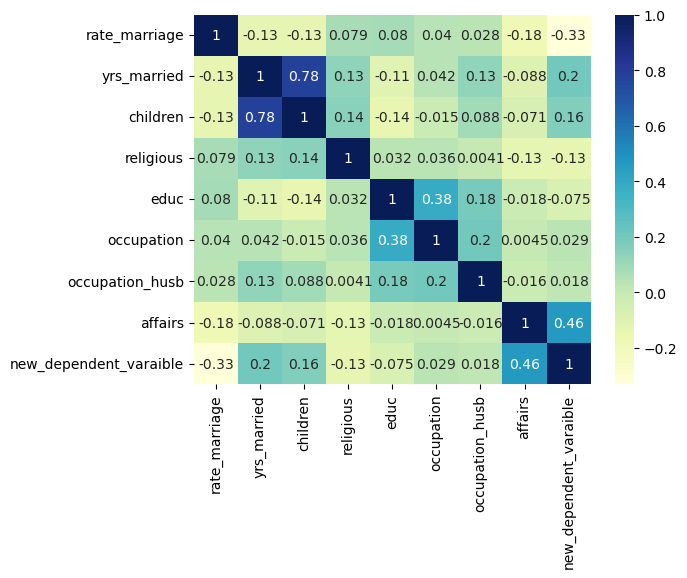

In [54]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)